In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons
%matplotlib inline
np.seterr(all="ignore")

{'divide': 'ignore', 'invalid': 'ignore', 'over': 'ignore', 'under': 'ignore'}

In [128]:
def cost_functions(data, centroids, data_clasters):
    dist = np.power(data - centroids[data_clasters[:, 0]], 2)
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    return dist.sum() / data.shape[0]

In [129]:
class K_means:
    
    def __init__(self, visualization=True):
        self.visualization = visualization
        if visualization:
            self.fig, self.axes = plt.subplots(1, 1, figsize=(10, 8))
    
    def _k_means(self, data, centroids, iterations=5):
    
        claster_number = centroids.shape[0]
        for i in range(iterations):
            
            # todo: rewrite this
            data_clasters = np.argmin(
                np.linalg.norm(
                    data[:, np.newaxis] - centroids, 
                    axis=2), 
                axis=1)[:, np.newaxis]

            for k in range(claster_number):
                # todo: rewrite this
                centroids[k] = np.mean(data[np.where(data_clasters==k)[0]], axis=0)

        return data_clasters, centroids
        
    def init_centroids(self, data, k=1):
        num_rows = data.shape[0]
        return data[np.random.randint(0, num_rows, k)]    
 
        
    def run(self, data, k=2, number_initializations=1000, iterations=1000):
        
        best_centroids = self.init_centroids(data, k)
        best_cost = 0
        
        for i in range(number_initializations):
            
            centroids = self.init_centroids(data, k)
            data_clasters, centroids = self._k_means(data, centroids, iterations)
            cost = cost_functions(data, centroids, data_clasters)
            
            if cost <= best_cost:
                best_cost = cost
                best_centroids = centroids
                
        data_clasters, self.centroids = self._k_means(data, best_centroids, iterations)
        
        # plotting 
        self.plot_data(data, data_clasters)
        self.plot_centroids()
        return data_clasters
    
    def predict(self, data):
        data_clasters = np.argmin(
                np.linalg.norm(
                    data[:, np.newaxis] - self.centroids, 
                    axis=2), 
                axis=1)[:, np.newaxis]
        return data_clasters
    
    def plot_data(self, data, data_clasters=None):
        feature_number = data.shape[1]
        self.axes.set_xticks([])
        self.axes.set_yticks([])
        if data_clasters is None:
            self.axes.scatter(data[:, 0], data[:, 1], s=5)
        else:
            self.axes.scatter(data[:, 0], data[:, 1], s=5, 
                               c=data_clasters, 
                               cmap=plt.cm.brg_r)
        self.fig.tight_layout()
        
    def pGeneration of datasetlot_centroids(self):
        self.axes.scatter(self.centroids[:, 0], 
                            self.centroids[:, 1], 
                            s=200, 
                            c="r", 
                            marker="+")

## Generation of dataset

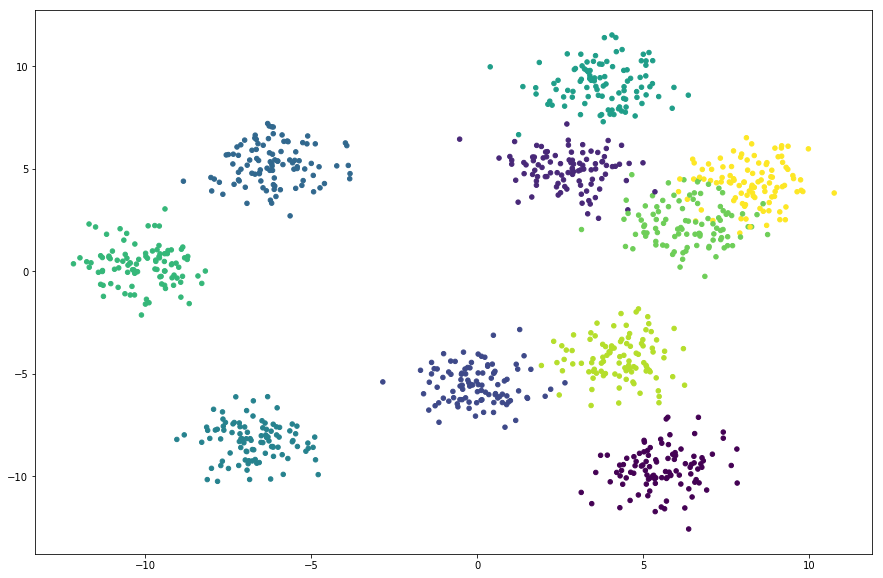

In [130]:
data, data_centers = make_blobs(n_samples=1000, n_features=2, random_state=10, centers=10, cluster_std=1)
plt.figure(figsize=(15, 10))
plt.scatter(data[:, 0], data[:, 1], c=data_centers, s=20)

## Example of using my K-means

c:\users\yevheniihyzyla\anaconda3\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


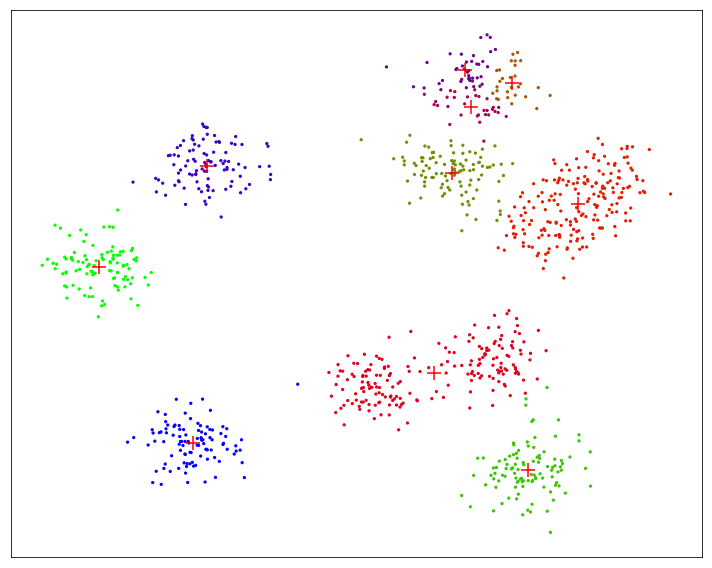

In [131]:
mykmeans = K_means(visualization=True)
predicted_data_clasters = mykmeans.run(data, k=10, number_initializations=1000, iterations=100)

## Comparing with sklearn

In [132]:
from sklearn.cluster import KMeans
kmeans  = KMeans(n_clusters=10, max_iter=50, n_init=1000).fit(data)

In [133]:
cost_functions(data, mykmeans.centroids, predicted_data_clasters)

1.5283480304825643

In [134]:
cost_functions(data, kmeans.cluster_centers_, kmeans.labels_[:, np.newaxis])

1.1958631806890241

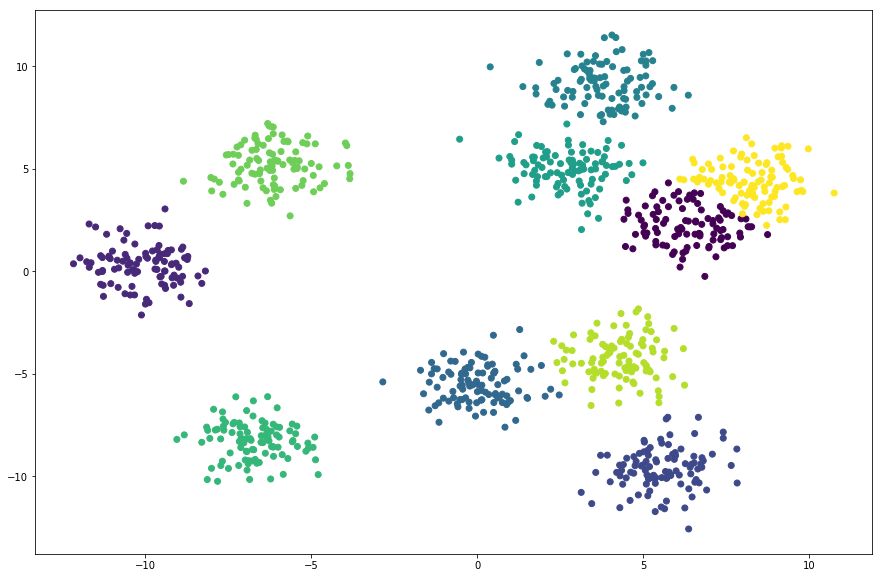

In [135]:
plt.figure(figsize=(15, 10))
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)